#  Analyzing and Visualizing Report. 

In [109]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import requests 
from PIL import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
from wordcloud  import WordCloud
import tweepy
from tweepy import OAuthHandler
import json
from datetime import datetime
import re
import io
%matplotlib inline



In [11]:
consumer_key='****'
consumer_secret='****'
access_token='****'
access_token_secret='****'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit_notify=True,wait_on_rate_limit=True)


## introduction.
This report highlights some insights and analyzes cleaned data regarding 1400 tweets tweeted by WeRateDogs account.

## Info about WeRateDogs account.

In [15]:
we_rate_dogs=api.get_user('dog_rates')
print('The screen name, handle, or alias that this user identifies themselves with:',we_rate_dogs.screen_name) 
print('The name of the user, as they’ve defined it:',we_rate_dogs.name) 
print('The UTC datetime that the user account was created on Twitter:',we_rate_dogs.created_at)
print('The user-defined UTF-8 string describing their account:',we_rate_dogs.description) 
print('The number of Tweets this user has liked in the account’s lifetime:',str(we_rate_dogs.favourites_count))
print('The number of followers this account currently has:',str(we_rate_dogs.followers_count))
print('The number of users this account is following:',str(we_rate_dogs.friends_count))
print('The number of Tweets (including retweets) issued by the user:',str(we_rate_dogs.statuses_count))
print('The number of public lists that this user is a member of:',str(we_rate_dogs.statuses_count))
print('\n','These informations above have been taken on:',datetime.utcnow(),'UTC')


The screen name, handle, or alias that this user identifies themselves with: dog_rates
The name of the user, as they’ve defined it: WeRateDogs®
The UTC datetime that the user account was created on Twitter: 2015-11-15 21:41:29
The user-defined UTF-8 string describing their account: Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
The number of Tweets this user has liked in the account’s lifetime: 144405
The number of followers this account currently has: 8631591
The number of users this account is following: 14
The number of Tweets (including retweets) issued by the user: 11468
The number of public lists that this user is a member of: 11468

 These informations above have been taken on: 2020-01-22 19:18:57.710199 UTC


## Info about  the most common dog breed in our tweets.

In [17]:
twitter_archive_master=pd.read_csv('./twitter_archive_master.csv')

Golden retriever is the most common dog breed in our data.

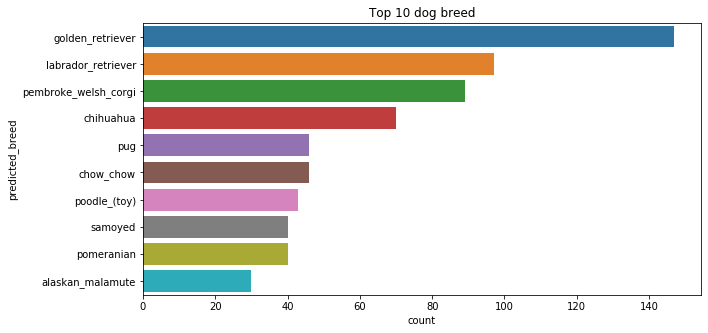

In [24]:
plt.figure(figsize=(10,5))
order_breed = twitter_archive_master.predicted_breed.value_counts().head(10).index
sns.countplot(y = twitter_archive_master.predicted_breed,order = order_breed)
plt.title('Top 10 dog breed');

Tweet full text: Everyone needs to watch this. 13/10
The weight of the Golden Retriever dog breed: 65-75 pounds (male), 55-65 pounds (female)
The height Golden Retriever dog breed: 23-24 inches (male), 21.5-22.5 inches (female)
The life expectancy of the Golden Retriever dog breed: 11.0 years
The Golden Retriever dog breed temperament: Friendly,Intelligent,Devoted
The Golden Retriever breed group: Sporting Group
AKC predicted Golden Retriever popularity: 3


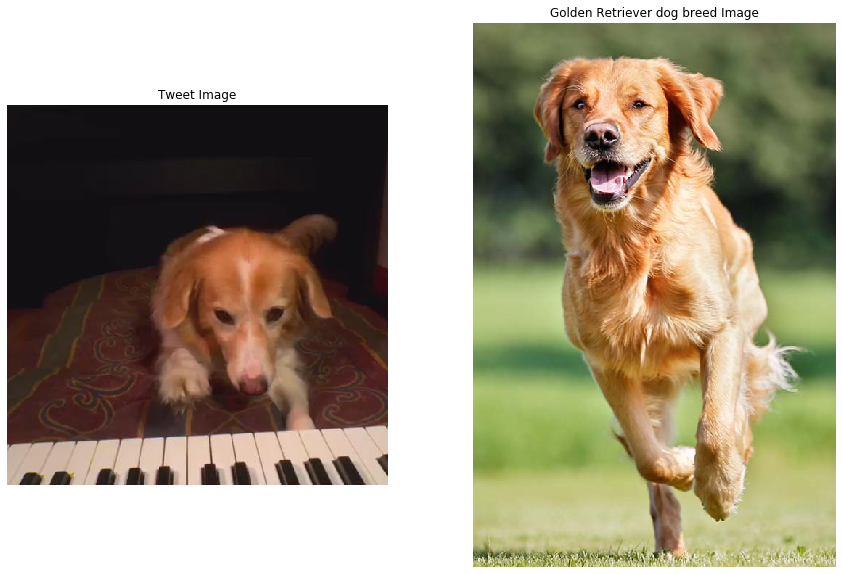

In [132]:
golden_retriever=twitter_archive_master.query('predicted_breed=="golden_retriever"').sample(1,random_state=42)

print('Tweet full text:',golden_retriever.full_text.values[0])
print('The weight of the Golden Retriever dog breed:',golden_retriever.weight.values[0])
print('The height Golden Retriever dog breed:',golden_retriever.height.values[0])
print('The life expectancy of the Golden Retriever dog breed:',golden_retriever.life_expectancy.values[0],'years')
print('The Golden Retriever dog breed temperament:',','.join(re.findall(r"\w+",golden_retriever.breed_temperament.values[0])))
print('The Golden Retriever breed group:',golden_retriever.breed_group.values[0])
print('AKC predicted Golden Retriever popularity:',golden_retriever.akc_breed_popularity.values[0])

image_1 = requests.get(re.findall(r"'(.*)'",golden_retriever.images_urls.values[0])[0])
image_1 = Image.open(io.BytesIO(image_1.content))
image_2 = requests.get(golden_retriever.breed_image.values[0])
image_2 = Image.open(io.BytesIO(image_2.content))
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(image_1)
ax[0].axis('off')
ax[0].set_title('Tweet Image')
ax[1].imshow(image_2)
ax[1].axis('off')
ax[1].set_title('Golden Retriever dog breed Image');

## Word Cloud of the dog names in our data.

Cooper,Penny,Lucy,Charlie and Oliver are the most common dog names in our data.

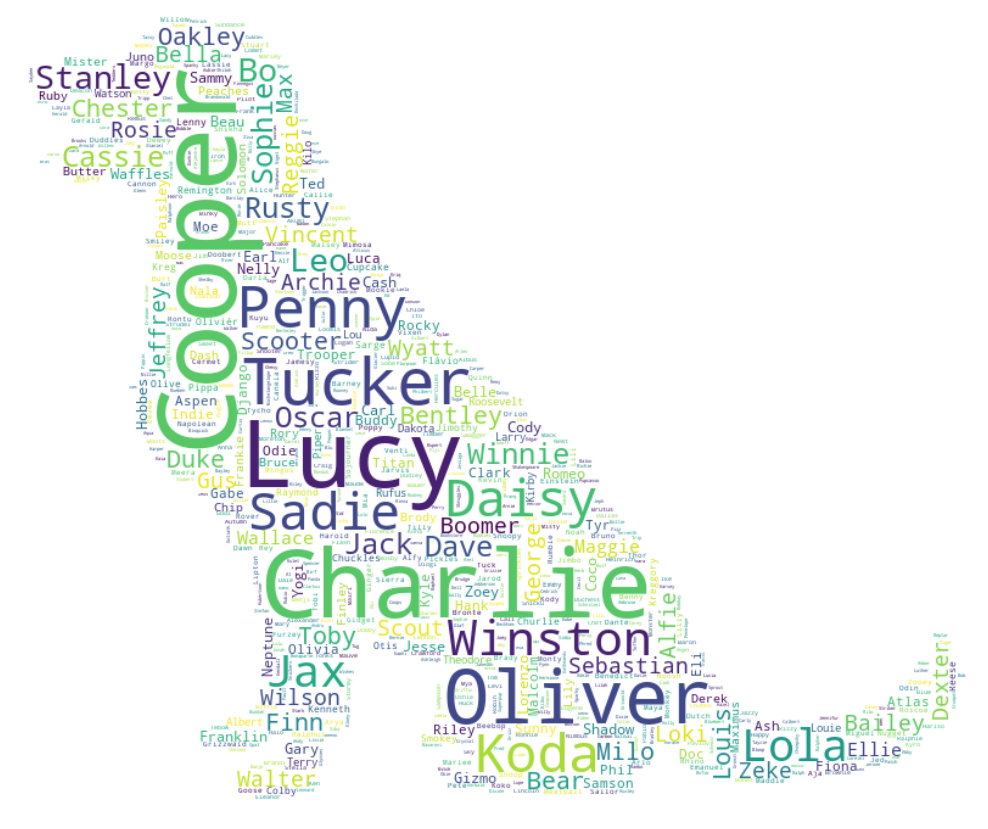

In [133]:
mask = np.array(Image.open('./golden_retriever.jpg'))
for z in range(mask.shape[2]):
    for y in range(mask.shape[1]):
        for x in range(mask.shape[0]):
            if mask[x,y,z] == 0:
                mask[x,y,z] = 255
            else:
                pass 
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42,contour_color='steelblue')
wc.generate(twitter_archive_master.dog_name.str.cat(sep=' '))
plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show();

In [134]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide the code."></form>''')